In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

A very, very quick attempt at K Nearest Neighbors, just to see how that treats us.

In [2]:
df = pd.read_csv('cleaned_datasets/creatures_transformed.csv', index_col=0)

In [3]:
df.head()

,name,colors,manaValue,power,toughness,Adamant,Adapt,Afflict,Afterlife,Alliance,...,Weird,Werewolf,Whale,Wizard,Wolf,Wolverine,Worm,Wurm,Yeti,Zombie
0,Aeronaut Admiral,W,4.0,3.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aether Inspector,W,4.0,2.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aethergeode Miner,W,2.0,3.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Airdrop Aeronauts,W,5.0,4.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Audacious Infiltrator,W,2.0,3.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(3791, 282)

For our initial attempts at training models to identify a creatures color via it's mana value, power, toughness and keywords, it seems better to reduce the dataset to only include mono-colored creatures.  Including every possible combination of multi-colored creature would require a lot more work, but is something to consider for the future.

In [5]:
df.colors.unique()

array(['W', 'U', 'B', 'R', 'G', 'R, U', 'G, R', 'G, W', 'R, W', 'G, U',
       'U, W', 'B, R', 'B, G', 'C', 'B, W', 'B, U', 'G, R, W',
       'B, G, R, U, W', 'B, G, R', 'R, U, W', 'B, G, U', 'W, G',
       'G, R, U', 'B, G, W', 'B, R, W', 'G, U, W', 'B, U, W', 'B, R, U',
       'G, R, U, W'], dtype=object)

In [6]:
df['numColors'] = df.colors.str.split(', ').str.len()

In [7]:
df = df.query('numColors == 1')

In [8]:
df.colors.unique()

array(['W', 'U', 'B', 'R', 'G', 'C'], dtype=object)

In [9]:
df.drop(columns=['numColors'], inplace=True)

In [10]:
df.shape

(3244, 282)

#### Standardize the variables

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(df.drop(columns=['name', 'colors']))

MinMaxScaler()

In [14]:
scaled_features = scaler.transform(df.drop(columns=['name', 'colors']))

In [15]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[2:])

In [16]:
df_feat.head()

,manaValue,power,toughness,Adamant,Adapt,Afflict,Afterlife,Alliance,Amass,Ascend,...,Weird,Werewolf,Whale,Wizard,Wolf,Wolverine,Worm,Wurm,Yeti,Zombie
0,0.266667,0.230769,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.266667,0.153846,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.133333,0.230769,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.307692,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.133333,0.230769,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Train-Test-Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['colors'], test_size=0.33, random_state=101)

#### Choosing a K Value

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
len(df_feat)

3244

In [21]:
error_rate = []

for i in range(1, 60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

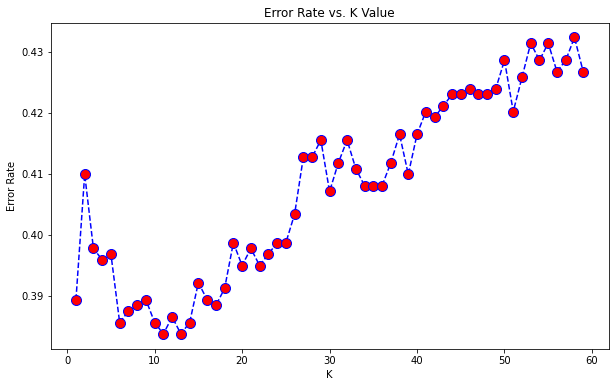

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
#K = 11
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=31')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=31


[[117   1  23  13  24  36]
 [  4  70   2   1   1   0]
 [ 13   0 130  46   6  14]
 [ 27   2  33 109  15  12]
 [ 25   4  14   7 106  20]
 [ 12   1  22  13  20 128]]


              precision    recall  f1-score   support

           B       0.59      0.55      0.57       214
           C       0.90      0.90      0.90        78
           G       0.58      0.62      0.60       209
           R       0.58      0.55      0.56       198
           U       0.62      0.60      0.61       176
           W       0.61      0.65      0.63       196

    accuracy                           0.62      1071
   macro avg       0.65      0.65      0.64      1071
weighted avg       0.62      0.62      0.62      1071



#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['colors'], test_size=0.33, random_state=101)

In [27]:
logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [28]:
predictions = logmodel.predict(X_test)

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       0.71      0.62      0.66       214
           C       0.95      0.96      0.96        78
           G       0.66      0.70      0.68       209
           R       0.71      0.68      0.70       198
           U       0.71      0.76      0.74       176
           W       0.73      0.78      0.75       196

    accuracy                           0.72      1071
   macro avg       0.75      0.75      0.75      1071
weighted avg       0.72      0.72      0.72      1071



#### Decision Trees

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier()

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
tree_preds = dtree.predict(X_test)

In [34]:
print(classification_report(y_test,tree_preds))

              precision    recall  f1-score   support

           B       0.54      0.53      0.53       214
           C       0.95      0.92      0.94        78
           G       0.54      0.59      0.57       209
           R       0.50      0.49      0.50       198
           U       0.59      0.59      0.59       176
           W       0.59      0.57      0.58       196

    accuracy                           0.58      1071
   macro avg       0.62      0.61      0.62      1071
weighted avg       0.58      0.58      0.58      1071



In [35]:
print(confusion_matrix(y_test,tree_preds))

[[113   1  22  29  24  25]
 [  1  72   3   0   1   1]
 [  8   0 123  40  13  25]
 [ 36   1  40  97  15   9]
 [ 26   2  18   9 103  18]
 [ 26   0  20  18  20 112]]


In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
rfc_pred = rfc.predict(X_test)

In [38]:
print(confusion_matrix(y_test, rfc_pred))

[[116   1  20  26  24  27]
 [  0  75   1   0   2   0]
 [  4   0 142  35   6  22]
 [ 26   3  32 112  15  10]
 [ 20   2  15  11 116  12]
 [ 15   0  16   4  20 141]]


In [39]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           B       0.64      0.54      0.59       214
           C       0.93      0.96      0.94        78
           G       0.63      0.68      0.65       209
           R       0.60      0.57      0.58       198
           U       0.63      0.66      0.65       176
           W       0.67      0.72      0.69       196

    accuracy                           0.66      1071
   macro avg       0.68      0.69      0.68      1071
weighted avg       0.65      0.66      0.65      1071

